In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
import pandas as pd
import os
import glob
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.table import Table
import scipy as scipy
from scipy import optimize
np.set_printoptions(threshold=np.inf)
from scipy.optimize import differential_evolution

In [2]:
def gaussian(x, A, mu, sig):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

In [44]:
hdulist1 = fits.open('../data/composite_Io_disk.fits')
evt_data1 = Table(hdulist1[1].data)
image_data1 = hdulist1[1].data
df1 = pd.read_csv('../data/Io_Master_Line_List (1).csv') #spaces in csv file will make df object type and not float64
#line = "S I"
#target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
#df = df[target_mask]
df_wavelength1 = df1['Wavelength']
df_species1 = df1['Species']
wl1 = evt_data1['WAVELENGTH'].data
flux1 = evt_data1['FLUX'].data

In [45]:
hdulist2 = fits.open('../data/composite_Io_eclipsed.fits')
evt_data2 = Table(hdulist2[1].data)
image_data2 = hdulist2[1].data
df2 = pd.read_csv('../data/Io_Master_Line_List (1).csv') #spaces in csv file will make df object type and not float64
#line = "S I"
#target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
#df = df[target_mask]
df_wavelength2 = df2['Wavelength']
df_species2 = df2['Species']
wl2 = evt_data2['WAVELENGTH'].data
flux2 = evt_data2['FLUX'].data

In [46]:
wavelength_list = df_wavelength2.values.tolist()

Text(0.5, 1.0, 'COS Io Disk Spectrum at 1448.229')

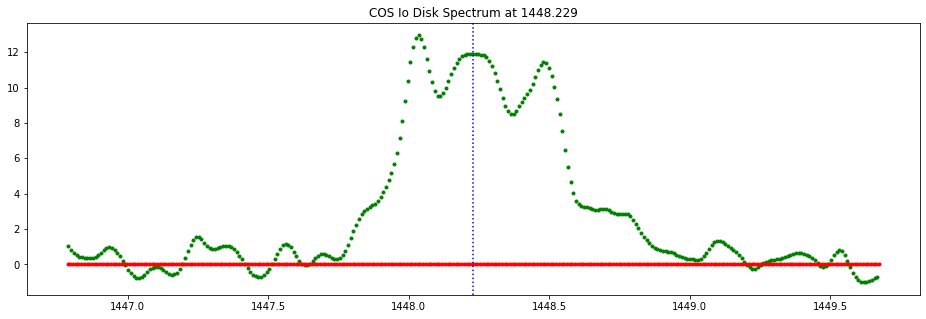

In [163]:
i=91
line = wavelength_list[i]
left_bound = 0.999*line
right_bound = 1.001*line
sub_region1 = (evt_data1['WAVELENGTH'] > left_bound) & (evt_data1['WAVELENGTH'] < right_bound) #only take values within this area
wl1 = evt_data1['WAVELENGTH'][sub_region1]
flux1 = evt_data1['FLUX'][sub_region1]
unc1 = 0.1*flux1 #placeholder uncertainty
wl1 = wl1.data
flux1 = flux1.data

sub_region2 = (evt_data2['WAVELENGTH'] > left_bound) & (evt_data2['WAVELENGTH'] < right_bound) #only take values within this area
wl2 = evt_data2['WAVELENGTH'][sub_region2]
flux2 = evt_data2['FLUX'][sub_region2]
unc2 = 0.1*flux2 #placeholder uncertainty
wl2 = wl2.data
flux2 = flux2.data/10**-16

plt.figure(figsize=(16, 5))
plt.plot(wl1, flux1, 'g.', label='disk')
plt.plot(wl2, flux2, 'r.', label='eclipse')
plt.axvline(x=line, color = 'blue', linestyle = 'dotted')
plt.title('COS Io Disk Spectrum at {}'.format(line))